# Indicadores climatológicos

El siguiente ejercicio te permitirá generar indicadores para el Estado de Aguascalientes, como base se va a utilizar la base de datos de la RNEAA.


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

In [2]:
# leer csv
df = pd.read_csv("/Users/jorgemauricio/Documents/Research/INIFAP_Course/data/ags_curso.csv")

In [3]:
# estructura del DataFrame
df.head()

,numero,nombre,longitud,latitud,fecha,prec,temt,radg,humr
0,2,La Mirinda,-102.251778,22.248528,2013-02-01 12:30:00,NaN,NaN,NaN,NaN
1,2,La Mirinda,-102.251778,22.248528,2013-02-01 12:45:00,0.0,25.6,733.1,15.0
2,2,La Mirinda,-102.251778,22.248528,2013-02-01 13:00:00,0.0,26.0,678.9,13.0
3,2,La Mirinda,-102.251778,22.248528,2013-02-01 13:15:00,0.0,26.9,690.6,13.0
4,2,La Mirinda,-102.251778,22.248528,2013-02-01 13:30:00,0.0,26.5,649.1,13.0


In [4]:
# información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16579988 entries, 0 to 16579987
Data columns (total 9 columns):
numero      int64
nombre      object
longitud    float64
latitud     float64
fecha       object
prec        float64
temt        float64
radg        float64
humr        float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.1+ GB


In [5]:
# información estadística del DataFrame
df.describe()

,numero,longitud,latitud,prec,temt,radg,humr
count,1.657999e+07,1.657999e+07,1.657999e+07,1.608549e+07,1.620985e+07,1.619631e+07,1.618895e+07
mean,2.827274e+04,-1.023456e+02,2.199849e+01,1.487568e-02,1.731362e+01,2.112363e+02,5.136799e+01
std,8.670123e+04,1.966635e-01,1.754575e-01,2.445433e-01,6.541935e+00,2.989865e+02,2.593395e+01
min,2.000000e+00,-1.027694e+02,2.166045e+01,0.000000e+00,-3.530000e+01,0.000000e+00,1.000000e+00
25%,1.347300e+04,-1.024591e+02,2.186480e+01,0.000000e+00,1.290000e+01,0.000000e+00,2.900000e+01
50%,1.883300e+04,-1.022952e+02,2.197800e+01,0.000000e+00,1.710000e+01,5.900000e+00,5.000000e+01
75%,2.457600e+04,-1.022548e+02,2.214189e+01,0.000000e+00,2.210000e+01,3.990000e+02,7.300000e+01
max,8.600300e+05,-1.019693e+02,2.236372e+01,6.500000e+01,5.990000e+01,1.754800e+03,1.002000e+02


In [6]:
# Generar columnas año, mes, día
df["year"] = pd.DatetimeIndex(df["fecha"]).year
df["month"] = pd.DatetimeIndex(df["fecha"]).month
df["day"] = pd.DatetimeIndex(df["fecha"]).day

In [7]:
# estructura del DataFrame
df.head()

,numero,nombre,longitud,latitud,fecha,prec,temt,radg,humr,year,month,day
0,2,La Mirinda,-102.251778,22.248528,2013-02-01 12:30:00,NaN,NaN,NaN,NaN,2013,2,1
1,2,La Mirinda,-102.251778,22.248528,2013-02-01 12:45:00,0.0,25.6,733.1,15.0,2013,2,1
2,2,La Mirinda,-102.251778,22.248528,2013-02-01 13:00:00,0.0,26.0,678.9,13.0,2013,2,1
3,2,La Mirinda,-102.251778,22.248528,2013-02-01 13:15:00,0.0,26.9,690.6,13.0,2013,2,1
4,2,La Mirinda,-102.251778,22.248528,2013-02-01 13:30:00,0.0,26.5,649.1,13.0,2013,2,1


# Temperatura

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16579988 entries, 0 to 16579987
Data columns (total 12 columns):
numero      int64
nombre      object
longitud    float64
latitud     float64
fecha       object
prec        float64
temt        float64
radg        float64
humr        float64
year        int64
month       int64
day         int64
dtypes: float64(6), int64(4), object(2)
memory usage: 1.5+ GB


In [9]:
# agrupar los datos por año-mes
grouped = df.groupby(["year","month"]).mean()["temt"]

In [10]:
grouped

year  month
2002  1        11.853054
      2        13.372540
      3        17.235664
      4        20.533007
      5        21.894923
      6        20.785087
      7        18.408299
      8        18.810446
      9        18.541447
      10       17.646300
      11       13.887801
      12       12.124774
2003  1        12.477704
      2        15.300384
      3        16.833842
      4        20.629804
      5        22.886388
      6        21.346458
      7        18.500804
      8        18.678122
      9        18.403783
      10       16.768168
      11       15.606743
      12       11.568482
2004  1        11.792875
      2        13.112940
      3        17.062617
      4        18.603223
      5        20.401408
      6        18.801826
                 ...    
2015  12       13.261391
2016  1        11.373800
      2        14.369435
      3        15.959561
      4        19.310787
      5        22.544154
      6        20.525451
      7        19.125877
      8      

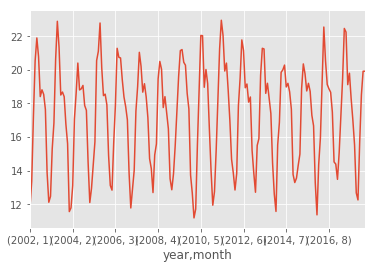

In [11]:
# desplegar la información en gráfica
grouped.plot()

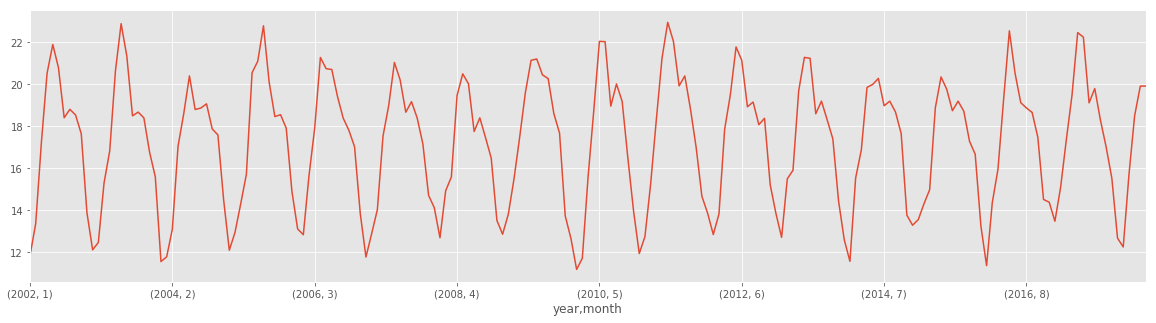

In [12]:
# modificar los parámetros para una mejor visualización
grouped.plot(figsize=(20,5))

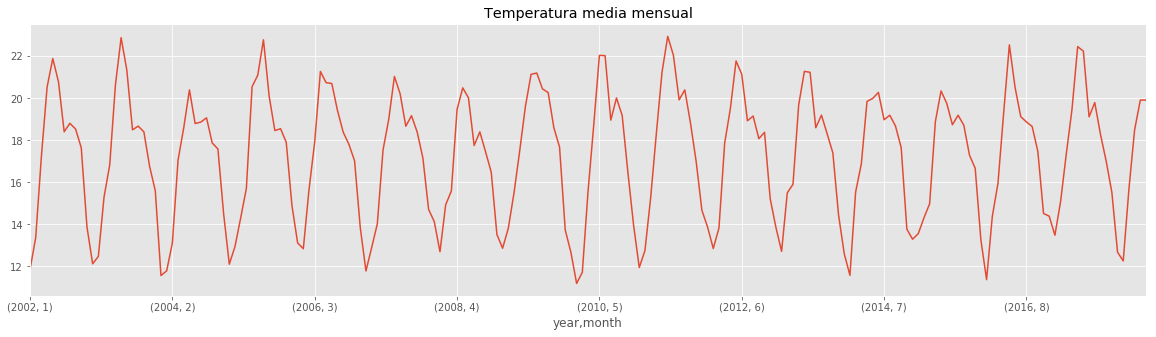

In [13]:
# agregar título a la gráfica
grouped.plot(title="Temperatura media mensual", figsize=(20,5))

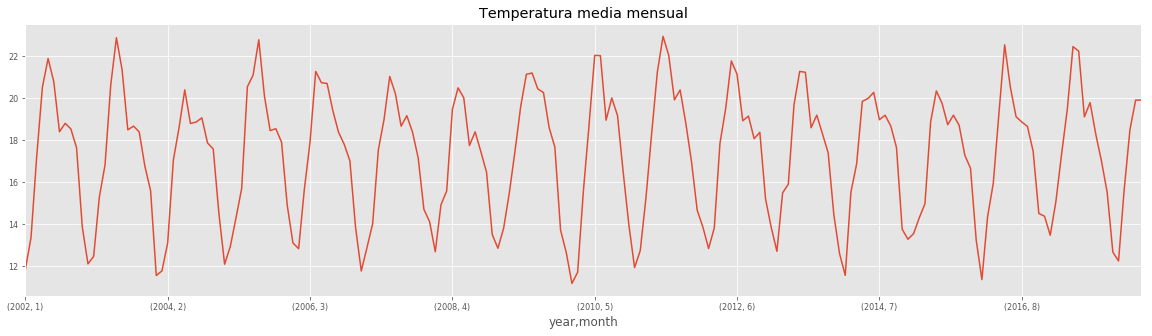

In [14]:
# modificar el tamaño de la letra 
grouped.plot(title="Temperatura media mensual", figsize=(20,5), fontsize=8)

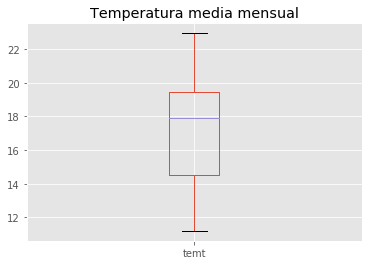

In [15]:
# gráfica de caja y bigotes
grouped.plot(title="Temperatura media mensual", kind="box")

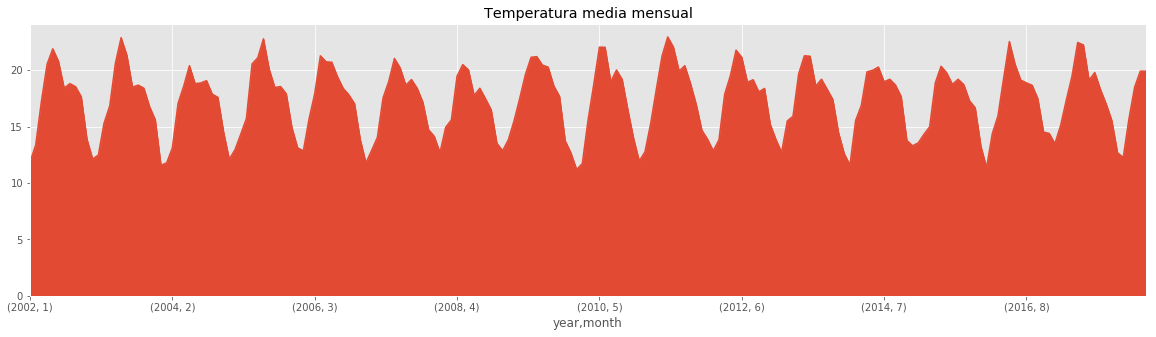

In [16]:
# gráfica de área
grouped.plot(title="Temperatura media mensual", kind="area", figsize=(20,5))

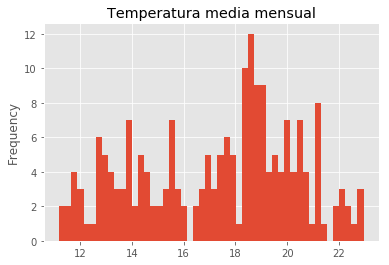

In [17]:
# gráfica histograma
grouped.plot(title="Temperatura media mensual", kind="hist", bins=50)

# Radiación

In [18]:
# agrupar los datos por año-mes
grouped_temp_radg = df.groupby(["year","month"]).mean()[["temt","radg"]]

In [19]:
grouped_temp_radg

temt        radg
year month                       
2002 1      11.853054  185.526266
     2      13.372540  199.544974
     3      17.235664  243.073733
     4      20.533007  251.797823
     5      21.894923  250.845596
     6      20.785087  231.018067
     7      18.408299  208.677697
     8      18.810446  237.935301
     9      18.541447  190.865857
     10     17.646300  187.207327
     11     13.887801  152.472069
     12     12.124774  147.886374
2003 1      12.477704  141.121024
     2      15.300384  199.155279
     3      16.833842  229.501237
     4      20.629804  227.258615
     5      22.886388  245.332896
     6      21.346458  216.805584
     7      18.500804  210.252117
     8      18.678122  214.621792
     9      18.403783  177.589992
     10     16.768168  179.692703
     11     15.606743  174.073904
     12     11.568482  154.585526
2004 1      11.792875  135.389573
     2      13.112940  192.778962
     3      17.062617  207.054471
     4      18.603223  243.947838
     5      20.401408  231.761142
     6      18.801826  193.454130
...               ...         ...
2015 12     13.261391  154.792460
2016 1      11.373800  183.143195
     2      14.369435  208.043647
     3      15.959561  223.982423
     4      19.310787  238.546162
     5      22.544154  263.678111
     6      20.525451  235.350917
     7      19.125877  227.878003
     8      18.875327  201.014298
     9      18.661513  198.649927
     10     17.479644  201.522764
     11     14.522078  153.550053
     12     14.391465  163.134329
2017 1      13.486195  177.672025
     2      15.097054  215.181112
     3      17.353727  231.849638
     4      19.476889  258.229011
     5      22.460648  262.679785
     6      22.242937  235.289950
     7      19.117961  216.907352
     8      19.797200  220.131584
     9      18.290243  180.665320
     10     17.016021  188.043319
     11     15.530292  182.912336
     12     12.680674  141.758374
2018 1      12.261707  159.467309
     2      15.687238  176.913783
     3      18.504761  233.700489
     4      19.916105  253.518905
     5      19.917451  199.861684

[197 rows x 2 columns]

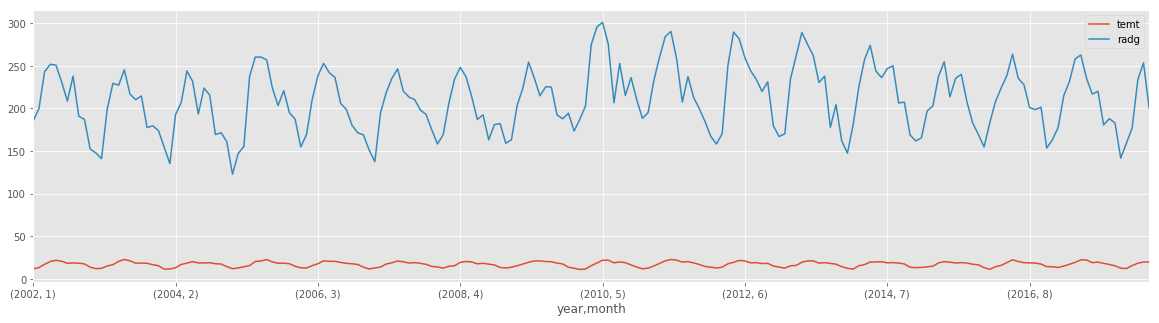

In [20]:
# modificar los parámetros para una mejor visualización
grouped_temp_radg.plot(figsize=(20,5))

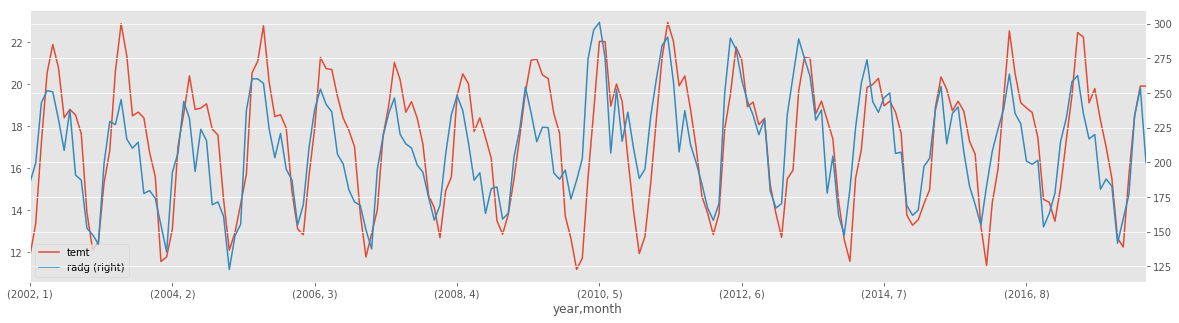

In [21]:
# utilizamos el parametro secondary_y, para generar una gráfica con dos escalas de valores para Y
grouped_temp_radg.plot(figsize=(20,5),secondary_y="radg")

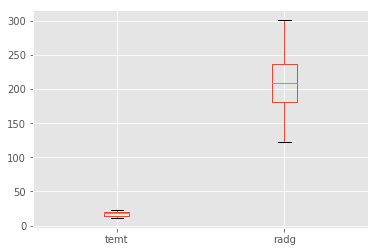

In [22]:
grouped_temp_radg.plot(kind="box")

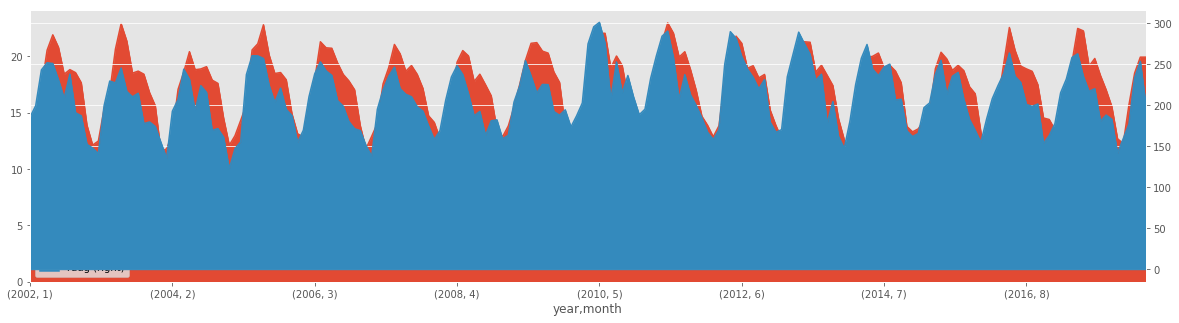

In [23]:
# utilizamos el parametro secondary_y, para generar una gráfica con dos escalas de valores para Y
grouped_temp_radg.plot(figsize=(20,5),secondary_y="radg", kind="area")

In [24]:
# agrupar los datos por año-mes media para temperatura y acumulado para radiación
# utilizamos el método .agg
grouped_temp_radg = df.groupby(["year","month"]).agg({"temt": "mean", "radg": "sum"})

In [25]:
grouped_temp_radg

temt          radg
year month                         
2002 1      11.853054  4.753554e+06
     2      13.372540  4.827392e+06
     3      17.235664  6.501007e+06
     4      20.533007  6.524837e+06
     5      21.894923  1.037146e+07
     6      20.785087  9.564379e+06
     7      18.408299  8.425362e+06
     8      18.810446  1.023836e+07
     9      18.541447  8.097484e+06
     10     17.646300  9.903642e+06
     11     13.887801  7.811754e+06
     12     12.124774  4.979630e+06
2003 1      12.477704  7.546729e+06
     2      15.300384  9.635929e+06
     3      16.833842  1.224527e+07
     4      20.629804  1.176472e+07
     5      22.886388  1.288807e+07
     6      21.346458  1.157764e+07
     7      18.500804  1.186789e+07
     8      18.678122  1.139706e+07
     9      18.403783  9.532498e+06
     10     16.768168  1.013611e+07
     11     15.606743  9.525324e+06
     12     11.568482  8.740884e+06
2004 1      11.792875  7.655468e+06
     2      13.112940  1.019724e+07
     3      17.062617  1.170769e+07
     4      18.603223  1.331467e+07
     5      20.401408  1.310470e+07
     6      18.801826  1.058581e+07
...               ...           ...
2015 12     13.261391  1.565927e+07
2016 1      11.373800  1.852677e+07
     2      14.369435  1.968675e+07
     3      15.959561  2.264686e+07
     4      19.310787  2.318716e+07
     5      22.544154  2.667658e+07
     6      20.525451  2.303874e+07
     7      19.125877  2.294982e+07
     8      18.875327  2.032456e+07
     9      18.661513  1.975037e+07
     10     17.479644  2.036287e+07
     11     14.522078  1.503163e+07
     12     14.391465  1.649924e+07
2017 1      13.486195  1.795109e+07
     2      15.097054  1.967573e+07
     3      17.353727  2.344023e+07
     4      19.476889  2.505260e+07
     5      22.460648  2.653276e+07
     6      22.242937  2.302124e+07
     7      19.117961  2.193671e+07
     8      19.797200  2.274752e+07
     9      18.290243  1.820528e+07
     10     17.016021  1.912495e+07
     11     15.530292  1.780999e+07
     12     12.680674  1.432369e+07
2018 1      12.261707  1.611242e+07
     2      15.687238  1.611172e+07
     3      18.504761  2.332050e+07
     4      19.916105  2.473406e+07
     5      19.917451  4.129142e+06

[197 rows x 2 columns]

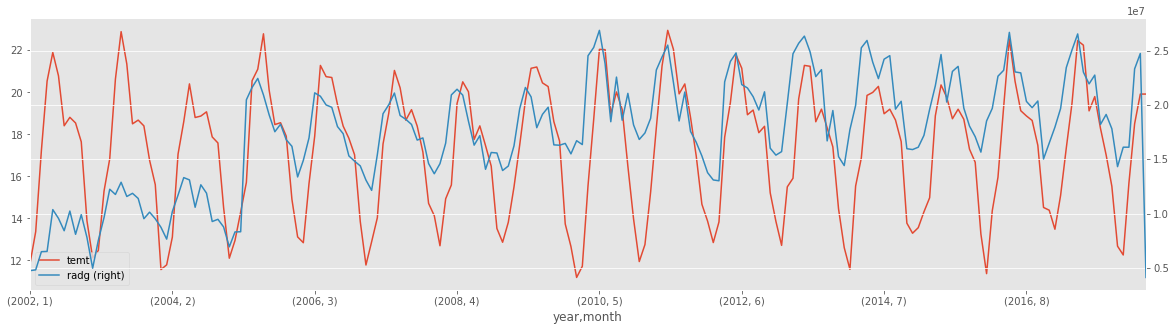

In [26]:
# utilizamos el parametro secondary_y, para generar una gráfica con dos escalas de valores para Y
grouped_temp_radg.plot(figsize=(20,5),secondary_y="radg")

In [27]:
# agrupar los datos por año-mes media para temperatura y acumulado para radiación
# utilizamos el método .agg
grouped_temp_radg = df.groupby(["year","month","day"]).agg({"temt": "mean", "radg": "sum"})

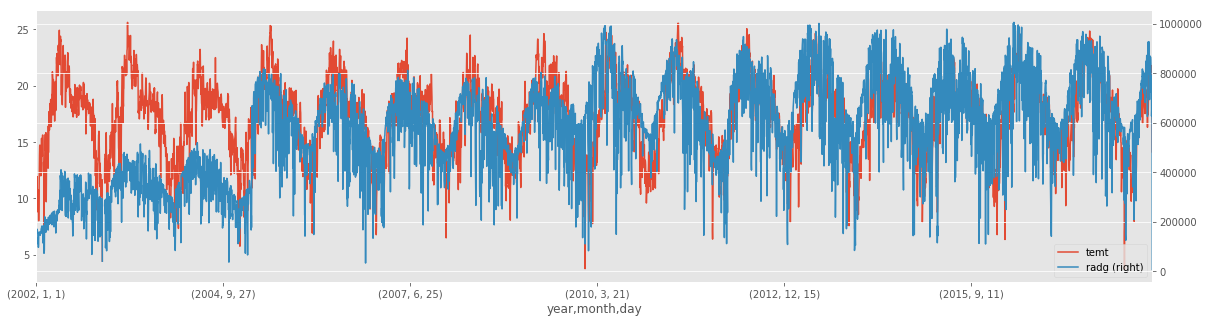

In [28]:
# utilizamos el parametro secondary_y, para generar una gráfica con dos escalas de valores para Y
grouped_temp_radg.plot(figsize=(20,5),secondary_y="radg")

In [29]:
# clasificar los datos a modo de tabla para desplegarlos en un heatmap
table = pd.pivot_table(df, values="radg", index=["year"], columns=["month"], aggfunc=np.sum)

In [30]:
# visualizar la tabla de datos
table

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2002,4.753554e+06,4.827392e+06,6.501007e+06,6.524837e+06,1.037146e+07,9.564379e+06,8.425362e+06,1.023836e+07,8.097484e+06,9.903642e+06,7.811754e+06,4.979630e+06
2003,7.546729e+06,9.635929e+06,1.224527e+07,1.176472e+07,1.288807e+07,1.157764e+07,1.186789e+07,1.139706e+07,9.532498e+06,1.013611e+07,9.525324e+06,8.740884e+06
2004,7.655468e+06,1.019724e+07,1.170769e+07,1.331467e+07,1.310470e+07,1.058581e+07,1.265438e+07,1.188296e+07,9.274217e+06,9.479159e+06,8.775255e+06,6.945530e+06
2005,8.316504e+06,8.333842e+06,2.047389e+07,2.160953e+07,2.244168e+07,2.091999e+07,1.908733e+07,1.753577e+07,1.822662e+07,1.680034e+07,1.619221e+07,1.337512e+07
2006,1.489818e+07,1.696635e+07,2.111463e+07,2.079987e+07,2.000169e+07,1.978014e+07,1.801066e+07,1.735503e+07,1.531263e+07,1.482624e+07,1.439425e+07,1.308611e+07
2007,1.214080e+07,1.542964e+07,1.919337e+07,2.001224e+07,2.109577e+07,1.902941e+07,1.867414e+07,1.820819e+07,1.676628e+07,1.696581e+07,1.460856e+07,1.366851e+07
2008,1.459878e+07,1.648275e+07,2.092485e+07,2.144438e+07,2.090420e+07,1.850817e+07,1.630183e+07,1.717804e+07,1.408044e+07,1.562649e+07,1.557908e+07,1.396770e+07
2009,1.437805e+07,1.623838e+07,1.964957e+07,2.160701e+07,2.074506e+07,1.790515e+07,1.913271e+07,1.978960e+07,1.632766e+07,1.629413e+07,1.646189e+07,1.549770e+07
2010,1.670977e+07,1.635344e+07,2.452585e+07,2.529115e+07,2.686267e+07,2.379024e+07,1.845536e+07,2.256227e+07,1.859516e+07,2.106578e+07,1.815934e+07,1.682469e+07


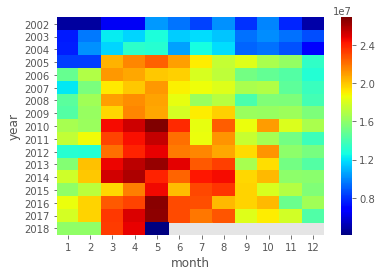

In [31]:
sns.heatmap(table, cmap="jet")

In [32]:
# clasificar los datos a modo de tabla para desplegarlos en un heatmap
table = pd.pivot_table(df, values="temt", index=["year"], columns=["month"], aggfunc=np.mean)

In [33]:
table

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2002,11.853054,13.372540,17.235664,20.533007,21.894923,20.785087,18.408299,18.810446,18.541447,17.646300,13.887801,12.124774
2003,12.477704,15.300384,16.833842,20.629804,22.886388,21.346458,18.500804,18.678122,18.403783,16.768168,15.606743,11.568482
2004,11.792875,13.112940,17.062617,18.603223,20.401408,18.801826,18.870573,19.071716,17.877133,17.591523,14.515085,12.107631
2005,12.952439,14.310387,15.717076,20.552392,21.100684,22.784069,20.101423,18.466042,18.554089,17.913193,14.906006,13.121264
2006,12.845169,15.661265,17.917984,21.279324,20.745968,20.704739,19.422403,18.392826,17.814273,17.028267,13.856144,11.784284
2007,12.894556,14.033121,17.543815,18.996491,21.040718,20.214225,18.672715,19.174060,18.394154,17.159313,14.717313,14.132377
2008,12.700440,14.935172,15.591914,19.467483,20.498863,20.027687,17.756224,18.403829,17.465796,16.489623,13.521373,12.866517
2009,13.817054,15.495753,17.489632,19.607437,21.143257,21.204639,20.449539,20.273531,18.604594,17.681830,13.736638,12.666722
2010,11.192598,11.724359,15.554290,18.714304,22.043616,22.030071,18.961810,20.017745,19.183290,16.486446,13.973845,11.948180


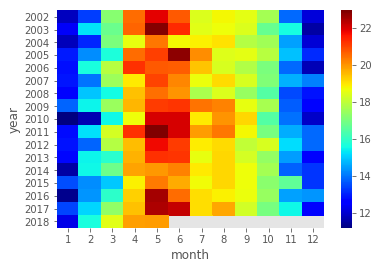

In [34]:
sns.heatmap(table, cmap="jet")

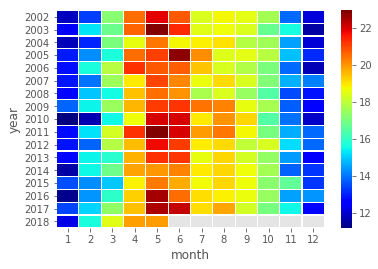

In [35]:
sns.heatmap(table, cmap="jet", linewidths=.2)

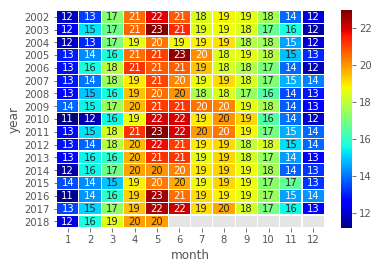

In [36]:
sns.heatmap(table, cmap="jet", linewidths=.2, annot=True)

# Regresión Lineal

In [40]:
# verificar estación con mayor número de registros
df["nombre"].value_counts().head()

San Carlos     572819
Santa Lucía    572818
Medio Kilo     572818
La Salada      572817
Don Primo      572817
Name: nombre, dtype: int64

In [41]:
# selecionar solo los registros de la estación San Carlos
df_san_carlos = df.loc[df["nombre"] == "San Carlos"]

In [42]:
# verificar el corte de información
df_san_carlos.head()

,numero,nombre,longitud,latitud,fecha,prec,temt,radg,humr,year,month,day
4844988,13475,San Carlos,-102.099722,22.089722,2002-01-01 00:00:00,NaN,NaN,NaN,NaN,2002,1,1
4844989,13475,San Carlos,-102.099722,22.089722,2002-01-01 00:15:00,0.0,8.5,0.0,32.0,2002,1,1
4844990,13475,San Carlos,-102.099722,22.089722,2002-01-01 00:30:00,0.0,10.0,1.0,31.0,2002,1,1
4844991,13475,San Carlos,-102.099722,22.089722,2002-01-01 00:45:00,0.0,10.3,1.0,30.0,2002,1,1
4844992,13475,San Carlos,-102.099722,22.089722,2002-01-01 01:00:00,0.0,10.7,1.0,31.0,2002,1,1


In [49]:
# agrupar la información por años
grouped_sc = df_san_carlos.groupby("year").mean()

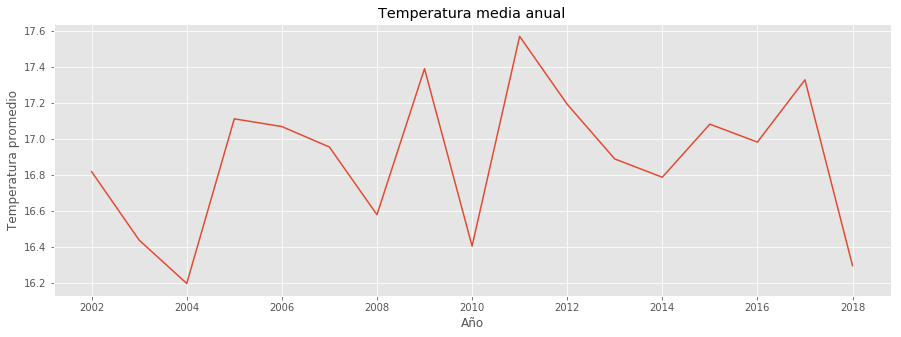

In [50]:
plt.figure(figsize=(15,5))
plt.plot(grouped_sc["temt"])

plt.title("Temperatura media anual")
plt.xlabel("Año")
plt.ylabel("Temperatura promedio")
plt.show()

In [51]:
# Para modelar los datos, vamos a necesitar de la libreria sklearn
from sklearn.linear_model import LinearRegression as LinReg

In [52]:
# generar los valores para x y y
x = grouped_sc.index.values.reshape(-1, 1)
y = grouped_sc['temt'].values

In [53]:
# generar el modelo
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Certeza: " + str(reg.score(x, y)))

Certeza: 0.0438332907382


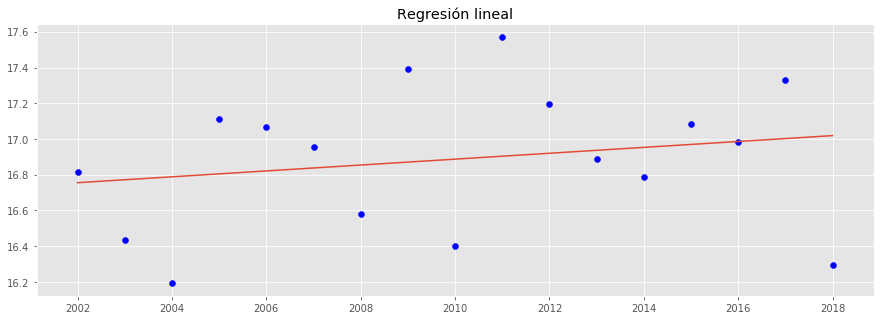

In [63]:
# desplegar los valores
plt.figure(figsize = (15, 5))
plt.title("Regresión lineal")
plt.plot(x, y_preds)
plt.scatter(x, y, c = "b")

In [64]:
# realizar una predicción
reg.predict(2019)

array([ 17.03544685])